# Circuit models 101

In this notebook, we will explore the basics of circuit models in AutoEIS. We will start by importing the necessary libraries.

In [1]:
import numpy as np
import autoeis as ae
ae.visualization.set_plot_style()

[ Info: Imported Revise in 0.2 s
[ Info: Imported BenchmarkTools in 0.2 s
[ Info: Imported OhMyREPL in 0.1 s


## Circuit representation

In AutoEIS, circuits are represented as strings. Please refer to [circuit notation](../circuit.md) for the syntax of the circuit string. Now, let's create a sample circuit string:

In [2]:
circuit = "R1-[P2,R3]-C4-[[R5,C6],[L7,R8]]-R2"

We can visualize the circuit model using the `draw_circuit` function, which requires the `lcapy` package to be installed, and a working LaTeX installation. See [here](https://lcapy.readthedocs.io/en/latest/install.html) for more details.

Suggestion: add a constraint between nodes (25, 27) and (28, 26) for vertical graph


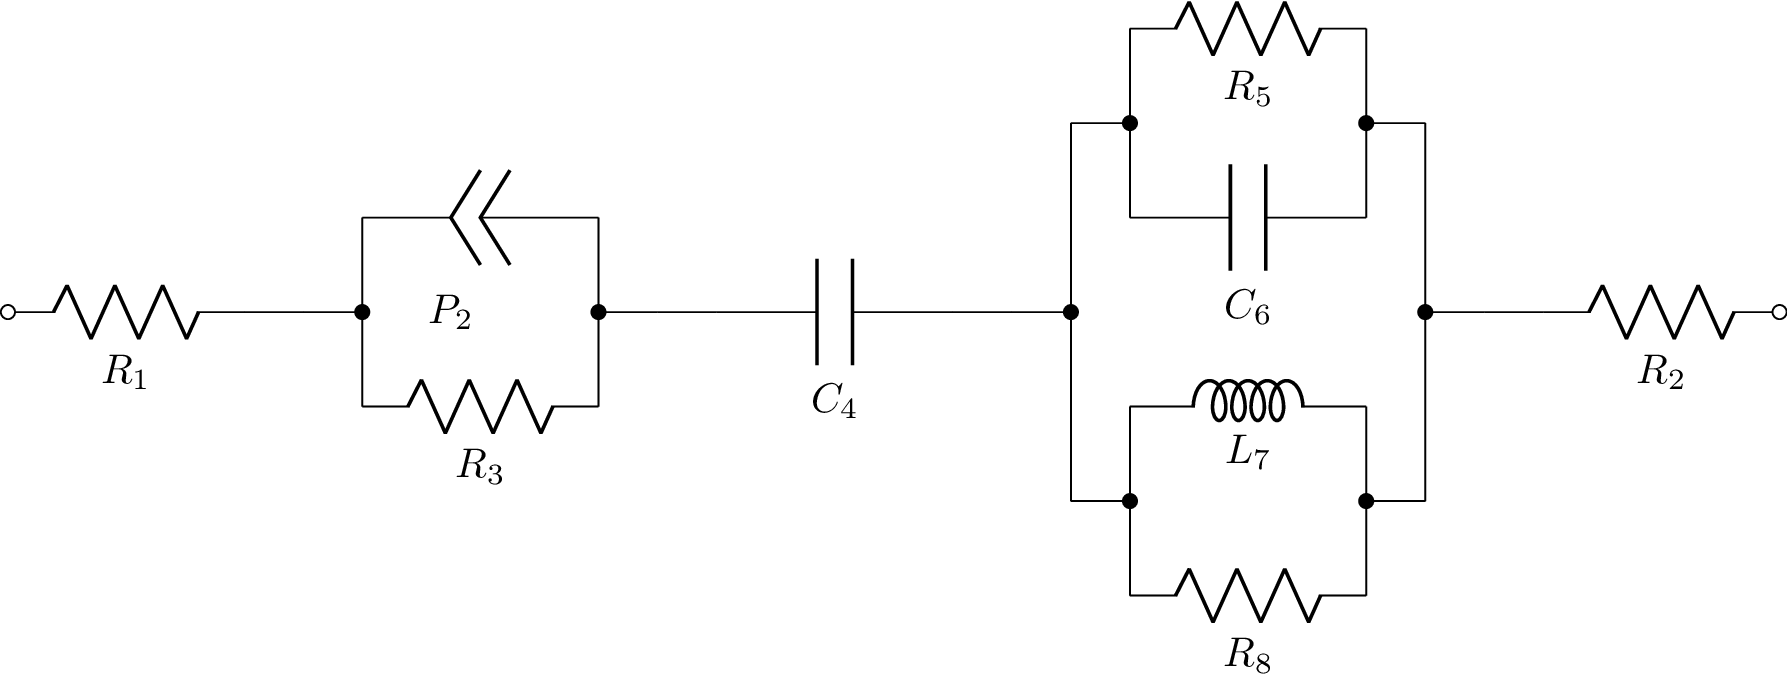

In [3]:
x = ae.visualization.draw_circuit(circuit)

## Querying circuit strings

Once you have the circuit string, you can run different queries on it. We're not going to explore all of available queries here, but we'll show you a few of the most common ones. To see the full list of available queries, check out the [API reference](../modules.rst).

To get the list of components in the circuit, you can use the `get_component_labels` function:

In [4]:
ae.parser.get_component_labels(circuit)

['R1', 'P2', 'R3', 'C4', 'R5', 'C6', 'L7', 'R8', 'R2']

(The impedance of) Each component is represented by one or more parameters. To get the list of parameters that fully describe the circuit, use the `get_parameter_labels` function:

In [5]:
ae.parser.get_parameter_labels(circuit)

['R1', 'P2w', 'P2n', 'R3', 'C4', 'R5', 'C6', 'L7', 'R8', 'R2']

Note that components and parameters are not the same, despite the fact that for single-parameter components they're represented by the same string. For instance, `R1` is both a parameter and a component, but `P2` is a component, which is described by the parameters `P2w` and `P2n`.

You can also validate the circuit using the `validate_circuit` function in case you're not sure if the circuit is valid:

In [6]:
ae.parser.validate_circuit(circuit)

True

Let's try to validate an invalid circuit string:

In [7]:
ae.parser.validate_circuit("R1-[R2,P3]-R1")

AssertionError: Duplicate elements found: {'R1'}

Another useful query is to compare two circuits to see if they are structurally equivalent. For instance, one would expect that `R1-R2` and `R2-R1` and `R5-R0` are equivalent, i.e., neither the order of appearance of the components nor the labels matter. This is useful for filtering out duplicate circuits, which may (and will) arise during circuit generation using evolutionary algorithms. You can do this using the `are_circuits_equivalent` function:

In [8]:
circuit1 = "R1-[P2,R3]-C4"
circuit2 = "C4-R1-[R3,P2]"
circuit3 = "C0-R5-[R9,P0]"

assert ae.utils.are_circuits_equivalent(circuit1, circuit2)
assert ae.utils.are_circuits_equivalent(circuit1, circuit3)

## Evaluating circuit strings

Once you have a valid circuit string, you can calculate the EIS spectra of the circuit model by evaluating it at the frequency range of interest. To do this, you need to convert the circuit string to a function using the `generate_circuit_fn` function:

In [9]:
circuit_fn = ae.utils.generate_circuit_fn(circuit)

Now, let's calculate the EIS spectra for a few frequencies. For this, we also need to pass the parameters of the circuit model, for which we can use random values:

In [10]:
freq = np.logspace(-3, 3, 10)
num_params = ae.parser.count_parameters(circuit)
p = np.random.rand(num_params)
Z = circuit_fn(freq, p)
Z

array([1.31224604-3.15463527e+02j, 1.30870746-6.79460179e+01j,
       1.35630867-1.45662084e+01j, 1.45656166-3.12402983e+00j,
       1.44771251-7.23602325e-01j, 1.34794177-2.66541669e-01j,
       1.21918839-1.06364114e-01j, 1.17811049-4.72247543e-02j,
       1.14814457-3.18940068e-02j, 1.12181823-2.52094831e-02j])